### 🧪 Phase 2, Week 7: Enzyme Catalysis (Quantum Tunneling in Chemistry) 🧪

This week, we'll investigate how one of the fundamental quantum phenomena we learned about – **quantum tunneling** – might be crucial for making life's chemical reactions happen fast enough. Specifically, we'll look at the role of tunneling in **enzyme catalysis**.

### What are Enzymes and Catalysis?

* **Enzymes** are like tiny biological machines, mostly made of proteins. Their main job is to **speed up (catalyze)** chemical reactions inside living cells without being used up themselves.
* Think of a chemical reaction as needing to climb a "hill" of energy to get started. This "hill" is called the **activation energy**.
* **Catalysis** is the process where enzymes help lower this energy hill, making it much easier and faster for reactions to happen. Without enzymes, many vital reactions in our bodies would be too slow to sustain life!

### The Quantum Twist: Quantum Tunneling in Enzyme Reactions

Traditionally, chemists thought that molecules had to *climb over* this energy hill to react. This is like a ball needing enough energy to roll *over* a hump.

However, recent research suggests that for some enzyme-catalyzed reactions, the quantum phenomenon of **tunneling** might be at play:

1.  **Proton or Hydride Transfer:** Many enzyme reactions involve the transfer of very light particles, like protons (hydrogen nuclei) or hydride ions (a hydrogen atom with two electrons).
2.  **The "Tunneling Shortcut":** Because these particles are so incredibly small and light, they behave more like waves (remember wave-particle duality!). This means, instead of having to gather enough energy to climb *over* the activation energy hill, they can sometimes **tunnel *through*** it.
3.  **Faster Reactions:** Tunneling is like taking a secret shortcut *through* the hill instead of climbing it. This means the reaction can happen much, much faster than if the particle had to rely only on having enough energy to get over the top.
4.  **Enzyme's Role:** Enzymes are believed to play a critical role in setting up the "tunnel" perfectly. They precisely position the reacting molecules, bringing them extremely close together and making the energy hill just the right shape and thickness for tunneling to be highly probable.

### Why is this important?

* **Life's Speed:** Many biological reactions occur at incredibly fast rates, even at body temperature. Classical explanations sometimes struggle to account for these speeds. Quantum tunneling offers a powerful explanation for how these reactions can proceed so rapidly.
* **Enzyme Design:** Understanding the role of tunneling could help scientists design new, more efficient artificial enzymes or drugs.
* **Fundamental Biology:** It highlights that quantum mechanics isn't just for tiny labs; it's potentially fundamental to the very chemistry of life itself.

### Key Quantum Concepts Revisited:

* **Quantum Tunneling:** The ability of a particle to pass through an energy barrier even if it doesn't have enough energy to go over it. This is purely a quantum phenomenon and doesn't happen in the classical world.
* **Wave-Particle Duality:** This property of matter is essential for tunneling. For a particle to tunnel, it must behave like a wave. Lighter particles (like protons) have a more pronounced wave-like nature, making them more likely to tunnel.
* **Probability:** Tunneling is a probabilistic event. The likelihood of tunneling depends on the height and width of the energy barrier, and the mass of the tunneling particle.

In our simulation, we won't model a specific enzyme reaction, but we'll adapt our previous tunneling code to visualize how the probability of a particle successfully "tunneling" changes with different barrier properties, giving us insight into how enzymes might optimize this process.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, mesolve, basis, qeye, destroy, tensor

Hamiltonian (H):
 Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.  -0.5]
 [-0.5  0. ]]
--- Debugging QuTiP Object Dimensions (2-site tunneling) ---
Dimensions of H (Hamiltonian): [[2], [2]]
Dimensions of psi0 (Initial State): [[2], [1]]
Dimensions of c_ops[0] (Collapse Operator): [[2], [2]]
Dimensions of e_ops[0] (Expectation Operator): [[2], [2]]
Dimensions of e_ops[1] (Expectation Operator): [[2], [2]]
---------------------------------------


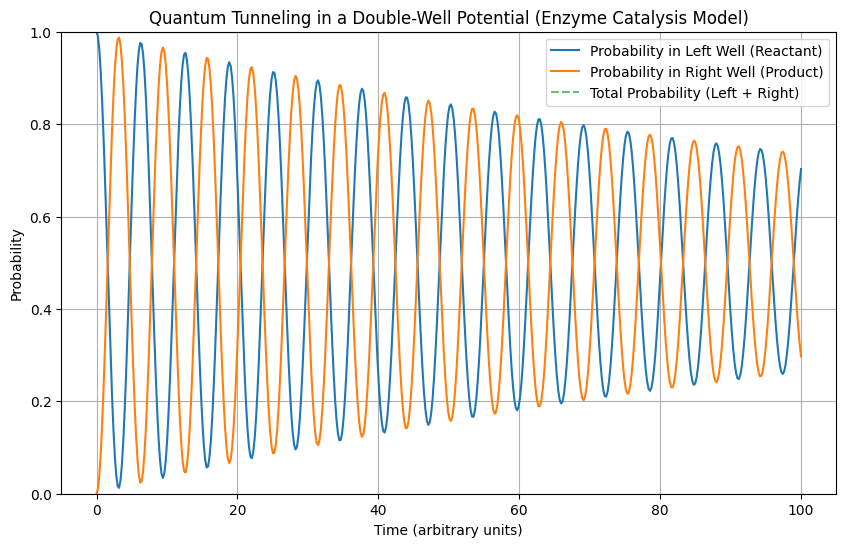


Simulation complete. The plot shows how the probability of the particle being
on the reactant side (left well) and product side (right well) changes over time.
You should observe oscillations (tunneling) between the wells, and a gradual
decay of total probability due to environmental interaction (gamma).
This simulates how a particle might tunnel through a reaction barrier, a process
enzymes are believed to enhance.


In [10]:
# --- 1. Define System Parameters ---
# We'll simulate a particle in a double-well potential
# Imagine a particle starting in one "valley" and needing to get to another.
# The "hill" between the valleys represents the activation energy barrier for a chemical reaction.


# Energy levels for the two "wells" (sites)
E_left_well = 0.0 # Energy of the left well (starting point, arbitrary units)
E_right_well = 0.0 # Energy of the right well (target point, arbitrary units). Set to same for symmetric barrier.

# Barrier height (related to activation energy)
# This 'V0' is the height of the energy hill the particle needs to overcome or tunnel through.
V0 = 1.0 # Strength of the tunneling barrier (arbitrary units)

# Tunneling coupling strength (J_tunnel)
# This represents how "thin" or "permeable" the barrier is. A larger J_tunnel means 
# it's easier for the particle to tunnel thrugh. This is analogous to how an enzyme 
# might "shape" the reaction pathway to enhance tunneling.
J_tunnel = 0.5 # Coupling strength representing tunneling (arbitrary units)

# Damping/Decoherence (how quickly quantum coherence is lost to the environment)
# In a real enzyme, the particle (like a proton) interacts with its surroundings,
# losing some of its quantum "wave-like" nature.
gamma = 0.01 # Decay rate (e.g., due to interaction with the solvent/protein)

# Simulation time
t_max = 100 # Maximum time for simulation (arbitrary units)
num_points = 500 # Number of time steps
tlist = np.linspace(0, t_max, num_points) # Array of time points

# --- 2. Define Quantum Operators and States ---
# We model our system as having two possible states for the particle:
# It's either in the "left well" (reactant side) or the "right well" (product side).

# Basis states for our two "sites" (wells)
# |0> represents the particle in the left well (reactant)
# |1> represents the particle in the right well (product)
left_well_state = basis(2, 0) # Corresponds to |0>
right_well_state = basis(2, 1) # Corresponds to |1>

# Identity operator for a single site (2x2 matrix)
I_s = qeye(2) # Represents "do nothing" on our 2-level system

# --- 3. Define the Hamiltonian (H) ---
# The Hamiltonian describes the total energy of the system and how it evolves.
# H = H_energies_of_wells + H_tunneling_between_wells

# H_energies_of_wells: Individual energies of the two wells.
# This part says: "If particle is in left well, it has energy E_left_well. If in right, E_right_well."
H_wells = E_left_well * left_well_state * left_well_state.dag() + \
          E_right_well * right_well_state * right_well_state.dag()

# H_tunneling_between_wells: Describes the tunneling interaction (hopping) between the wells.
# This term is the "tunneling operator." It allows the particle to move from left to right,
# and from right to left, with a strength given by J_tunnel.
# (left_well_state * right_well_state.dag()) is like a quantum switch: if particle is in right well, move it to left.
# (right_well_state * left_well_state.dag()) is the opposite switch.
H_tunneling = -J_tunnel * (left_well_state * right_well_state.dag() + \
                            right_well_state * left_well_state.dag())

# The minus sign here is common convention for tunneling/hopping Hamiltonians.

# Total Hamiltonian: Sum of all energy terms.
H = H_wells + H_tunneling

print("Hamiltonian (H):\n", H)

# --- 4. Define Initial State and Collapse Operators ---

# Initial State: Assume the particle starts in the left well (reactant side).
psi0 = left_well_state # Our starting quantum state |0>

# Collapse operators (c_ops): Model dissipation or decoherence.
# This simulates the particle losing its quantum "wave-like" nature or
# getting "stuck" due to interactions with the complex enzyme environment.
# We'll use a general decay (destroy) operator for each well.
c_ops = [np.sqrt(gamma) * destroy(2)] # This models decay from the excited state (right well) to the ground state (left well).
                                     # Or more generally, loss of 'quantumness'.

# --- 5. Evolve the System in Time ---
# Expectation operators (e_ops): What we want to measure over time.
# We want to track the probability of finding the particle in the left well (reactant)
# and the right well (product).

# Probability of particle in the left well (reactant)
P_left = left_well_state * left_well_state.dag() # Projector for |0><0|

# Probability of particle in the right well (product)
P_right = right_well_state * right_well_state.dag() # Projector for |1><1|

e_ops = [P_left, P_right] # List of operators for which to calculate expectation values

# --- Debugging QuTiP Object Dimensions ---
print("--- Debugging QuTiP Object Dimensions (2-site tunneling) ---")
print(f"Dimensions of H (Hamiltonian): {H.dims}")
print(f"Dimensions of psi0 (Initial State): {psi0.dims}")
if c_ops:
    for i, op in enumerate(c_ops):
        print(f"Dimensions of c_ops[{i}] (Collapse Operator): {op.dims}")
if e_ops:
    for i, op in enumerate(e_ops):
        print(f"Dimensions of e_ops[{i}] (Expectation Operator): {op.dims}")
print("---------------------------------------")

# Solve the master equation
output = mesolve(H, psi0, tlist, c_ops, e_ops)

# Extract probabilities
prob_left = output.expect[0] # Probability of particle in left well
prob_right = output.expect[1] # Probability of particle in right well

# --- 6. Plotting the Results ---
plt.figure(figsize=(10, 6))
plt.plot(tlist, prob_left, label='Probability in Left Well (Reactant)')
plt.plot(tlist, prob_right, label='Probability in Right Well (Product)')

# Optionally, plot the sum of probabilities to see how much is lost to decay
prob_total = prob_left + prob_right
plt.plot(tlist, prob_total, label='Total Probability (Left + Right)', linestyle='--', alpha=0.7)

plt.xlabel('Time (arbitrary units)')
plt.ylabel('Probability')
plt.title('Quantum Tunneling in a Double-Well Potential (Enzyme Catalysis Model)')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.show()

print("\nSimulation complete. The plot shows how the probability of the particle being")
print("on the reactant side (left well) and product side (right well) changes over time.")
print("You should observe oscillations (tunneling) between the wells, and a gradual")
print("decay of total probability due to environmental interaction (gamma).")
print("This simulates how a particle might tunnel through a reaction barrier, a process")
print("enzymes are believed to enhance.")
